# 1. Import Libraries

In [225]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

#import library library yang dibutuhkan disini !!
import warnings
warnings.filterwarnings('ignore')

# 2. Data Understanding

In [226]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [227]:
df_train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1959,NaN,Rencana Menikah,93792382.0,1.0,1.0,34.0,1234.0,19751.0,0.0,0.0,NaN,0.0,4.0,0.0,NaN,2
1,1975,Sarjana,Sendiri,175889229.0,0.0,0.0,88.0,139750.0,584840.0,112286.0,166656.0,0.0,6.0,10.0,0.0,NaN,5
2,1949,SMA,Menikah,134426109.0,0.0,0.0,NaN,107992.0,344639.0,30136.0,51281.0,1.0,8.0,7.0,NaN,NaN,4
3,1954,Sarjana,Sendiri,107043364.0,1.0,NaN,59.0,39685.0,34290.0,37379.0,36495.0,5.0,2.0,8.0,0.0,NaN,0
4,1965,Sarjana,Rencana Menikah,40338927.0,NaN,0.0,40.0,6581.0,46626.0,13210.0,7336.0,3.0,3.0,0.0,0.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,1967,Sarjana,Cerai,155565000.0,0.0,0.0,8.0,NaN,602854.0,141610.0,186116.0,0.0,12.0,4.0,0.0,2012-12-04,1
3050,1953,Sarjana,NaN,161564000.0,0.0,0.0,61.0,66759.0,697935.0,141610.0,68782.0,0.0,1.0,NaN,0.0,2013-05-09,6
3051,1953,Sarjana,Cerai,55120000.0,2.0,NaN,55.0,4046.0,26299.0,0.0,6069.0,1.0,2.0,1.0,0.0,2013-03-12,0
3052,1972,Sarjana,Rencana Menikah,32483683.0,1.0,0.0,66.0,5486.0,43785.0,27360.0,6206.0,3.0,2.0,4.0,0.0,NaN,0


In [228]:
df_test

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,2,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
2,3,1959,Sarjana,Rencana Menikah,137916316.0,0.0,0.0,21.0,38505.0,1146659.0,192956.0,240718.0,4.0,NaN,6.0,0.0,NaN
3,4,1965,Sarjana,Menikah,138197975.0,0.0,NaN,84.0,40357.0,214915.0,40670.0,43342.0,4.0,6.0,8.0,0.0,NaN
4,5,1952,Sarjana,Menikah,156350122.0,0.0,0.0,NaN,328922.0,327271.0,316441.0,119442.0,0.0,8.0,4.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,759,1963,Sarjana,Menikah,138195709.0,0.0,1.0,58.0,13653.0,505986.0,112615.0,100578.0,5.0,7.0,9.0,0.0,NaN
759,760,1964,Doktor,Menikah,135453678.0,0.0,0.0,64.0,44654.0,1016965.0,65784.0,82484.0,3.0,7.0,7.0,0.0,NaN
760,761,1981,Sarjana,Menikah,139090000.0,0.0,0.0,87.0,141610.0,758625.0,192185.0,285243.0,0.0,5.0,8.0,0.0,2012-10-31
761,762,1987,SMA,Menikah,165167035.0,NaN,0.0,20.0,NaN,674183.0,54447.0,53628.0,2.0,3.0,8.0,0.0,NaN


# 3. Exploratory Data Analysis

In [229]:
# Bikin analisis dan visualisasi dari kolom kolom yg ada di dataset !!! ( Cek Modul 3 GWE )

<AxesSubplot: xlabel='jumlah_promosi'>

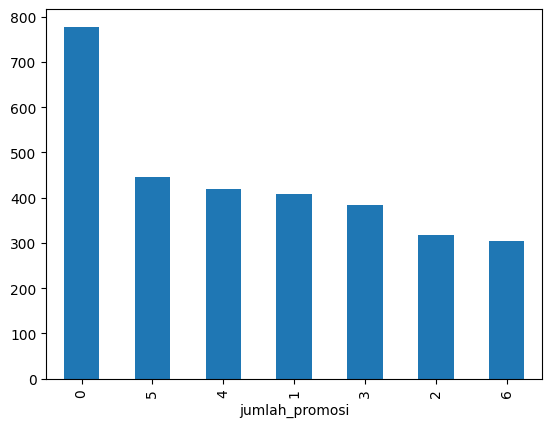

In [230]:
#contoh 
df_train['jumlah_promosi'].value_counts().plot(kind='bar')

# 4. Data Preprocessing

In [231]:
# Bersihkan dataset ( train dan test ) agar siap digunakan untuk training model ! ( Cek Modul 4 GWE )

In [232]:
df_train.drop('tanggal_menjadi_anggota', axis=1, inplace=True)
df_test.drop('tanggal_menjadi_anggota', axis=1, inplace=True)


le = LabelEncoder()
df_train['pendidikan'] = le.fit_transform(df_train['pendidikan'])
df_test['pendidikan'] = le.fit_transform(df_test['pendidikan'])

df_train['status_pernikahan'] = le.fit_transform(df_train['status_pernikahan'])
df_test['status_pernikahan'] = le.fit_transform(df_test['status_pernikahan'])

In [233]:
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# 5. Modeling & Evaluation

In [234]:

X = df_train.drop(columns=['jumlah_promosi'])
y = df_train['jumlah_promosi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [235]:
#evaluate model

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.27823240589198034
              precision    recall  f1-score   support

           0       0.29      0.81      0.43       156
           1       0.00      0.00      0.00        90
           2       0.00      0.00      0.00        65
           3       0.00      0.00      0.00        87
           4       0.31      0.11      0.16        91
           5       0.24      0.34      0.28        71
           6       0.21      0.18      0.19        51

    accuracy                           0.28       611
   macro avg       0.15      0.21      0.15       611
weighted avg       0.17      0.28      0.18       611



# 6. Submission

In [236]:
#make submission file
predictions = model.predict(df_test.drop(columns=['ID']))

# Membuat DataFrame submission
submission = pd.DataFrame({
    'ID': df_test.ID,
    'jumlah_promosi': predictions
}).set_index('ID')

# Membuat file CSV untuk submission kompetisi
submission.to_csv('coba.csv')